# Figure 1

In [1]:
import numpy as np
import pickle
import pysynphot as S
from astropy.time import Time
import astropy.io.ascii as asci
import astropy.constants as const

from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70., Om0=0.3)

import matplotlib
import matplotlib.pyplot as plt
fs= 10
matplotlib.rcParams['font.size']=fs

from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70., Om0=0.3)

import matplotlib
import matplotlib.pyplot as plt
fs = 10
matplotlib.rcParams['font.size']=fs

In [2]:
from load_opt_phot import predict_18cow_mag, load_fox_lc, load_koala_lc, predict_21csp_mag
from fit_utils import cc_bol, lum2flux

In [3]:
import sys
sys.path.insert(1, '/Users/yuhanyao/Dropbox/Projects/AT2020mrf/opt_spec/')
from load_opt_spec import load_cow_sps, load_mrf_sp, bin_spec

In [4]:
nu_pool = {
 'r.ztf': 471994480402802.2,
 'g.ztf': 634121907623677.2,
 'i.ztf': 380021535091050.1,
 'o.atlas': 450003936111481.4,
 'c.atlas': 575819723942441.0}

wave_pool = { 
 'r.ztf': 6356.006530923384,
 'g.ztf': 4730.95151568295,
 'i.ztf': 7894.289462520127,
 'o.atlas': 6666.608354414031,
 'c.atlas': 5209.963944027523}

In [5]:
colorg = "royalblue"
colorr = "orange"
colorc = "cyan"
coloro = "tomato"

z = 0.1353
t0 = 59012
D = cosmo.luminosity_distance([z])[0].value * 1e+6 # in pc
dis_mod = 5*np.log10(D/10)
dis_mod_ = dis_mod - 2.5 * np.log10(1+z)

lambda_eff_c = 5183.87
lambda_eff_o = 6632.15
lambda_eff_g = 4813.966872932173
lambda_eff_r = 6421.811631761602
lambda_eff_i = 7883.058236798149


lambda_eff_c_rest = int(lambda_eff_c/(1+z))
lambda_eff_o_rest = int(lambda_eff_o/(1+z))
lambda_eff_g_rest = int(lambda_eff_g/(1+z))
lambda_eff_r_rest = int(lambda_eff_r/(1+z))
lambda_eff_i_rest = int(lambda_eff_i/(1+z))

In [6]:
def create_new_yticks2(ylims2, which = "major"):
    yticks2_new = []
    if which=="major":
        candi = np.arange(-22, -15, 1)
    else:
        candi = np.arange(-22, -15, 0.1)
    for x in candi:
        if x<ylims2[0] and x>ylims2[1]:
            yticks2_new.append(x)
    yticks2_new = np.array(yticks2_new)
    return yticks2_new


def create_new_xticks1(xlims1, which = "major"):
    xticks1_new = []
    if which=="major":
        candi = np.arange(-10, 50, 10)
    else:
        candi = np.arange(-10, 50, 1)
    for x in candi:
        if x>xlims1[0] and x<xlims1[1]:
            xticks1_new.append(x)
    xticks1_new = np.array(xticks1_new)
    return xticks1_new


def add_tick(ax, xmax = 40):
    tsrg = Time(["2020-07-21T10:41:10.661","2020-07-24T14:41:21.682"]).mjd
    
    ax.tick_params(which = 'major', length = 4, top=False, direction = "in", right = False)
    ax.tick_params(which = 'minor', length = 2, top=False, direction = "in", right = False)
    ax.yaxis.set_major_locator(plt.MultipleLocator(1))
    ax.yaxis.set_minor_locator(plt.MultipleLocator(0.2))
    ax.xaxis.set_major_locator(plt.MultipleLocator(10))
    ax.xaxis.set_minor_locator(plt.MultipleLocator(1))
    ax.set_ylabel("AB magnitude")
    ax.set_xlabel(r"$t - t_0$"+" (rest frame days)")
    
    ymax = 24
    ymin = 17.8
    ax.set_ylim(ymax, ymin)
    
    xmin = -3
    ax.set_xlim(xmin, xmax)
    
    srg_phase_obs = (tsrg - t0)/(1+z)
    ax.fill_between(srg_phase_obs, ymin, ymax, color = "navy", alpha = 0.2) 
    #ax.text(35.0, 18.96, "SRG", color = "navy", fontsize = fs-1, style = "italic", fontweight = "bold")
    ax.text(34.0, 18.96, "eRASS2", color = "navy", fontsize = fs-1, fontweight = "bold")
    
    tspec = Time("2020-06-17T10:40:15").mjd
    spec_phase_obs = (tspec - t0) / (1+z)
    ax.plot([spec_phase_obs, spec_phase_obs], [ymin, ymin+0.15], color = "gray")
    ax.text(spec_phase_obs-0.3, ymin+0.32, "S", fontsize = fs-1.5, color = "gray")
    
    ########## upper x axis ##########
    axi1 = ax.twiny()
    axi1.tick_params(which = 'major', length = 4, direction = "in")
    axi1.tick_params(which = 'minor', length = 2, direction = "in")
    
    xlims1 = (xmin*(1+z), xmax*(1+z))
    xticks1_label = create_new_xticks1(xlims1, which = "major")
    xticks1_real = []
    for x in xticks1_label:
        xticks1_real.append(x/(1+z))
    xticks1_real = np.array(xticks1_real)
    
    xticks1_label_minor = create_new_xticks1(xlims1, which = "minor")
    xticks1_real_minor = []
    for x in xticks1_label_minor:
        xticks1_real_minor.append(x/(1+z))
    xticks1_real_minor = np.array(xticks1_real_minor)
    
    axi1.set_xticks(xticks1_real, minor = False)
    axi1.set_xticks(xticks1_real_minor, minor = True)
    axi1.set_xlim(xmin, xmax)
    axi1.set_xticklabels(xticks1_label)
    axi1.set_xlabel(r"$t - t_0$"+" (observed days)")
    
    ########## right y axis ##########
    axi2 = ax.twinx()
    axi2.tick_params(which = 'major', length = 4, direction = "in")
    axi2.tick_params(which = 'minor', length = 2, direction = "in")

    ylims2 = (ymax - dis_mod_, ymin - dis_mod_)
    yticks2_label = create_new_yticks2(ylims2, which = "major")
    yticks2_real = []
    for x in yticks2_label:
        yticks2_real.append(x + dis_mod_)
    yticks2_real = np.array(yticks2_real)
    
    yticks2_label_minor = create_new_yticks2(ylims2, which = "minor")
    yticks2_real_minor = []
    for x in yticks2_label_minor:
        yticks2_real_minor.append(x + dis_mod_)
    yticks2_real_minor = np.array(yticks2_real_minor)
    
    axi2.set_yticks(yticks2_real, minor = False)
    axi2.set_yticks(yticks2_real_minor, minor = True)
    axi2.set_ylim(ymax, ymin)
    axi2.set_yticklabels(yticks2_label)
    axi2.set_ylabel("Absolute magnitude")
    
    
    
def add_legend(ax):
    mec = colorg
    mfc = "none"
    ms = 5
    
    ax.errorbar(0, 0, 0.1, fmt = "o", markersize = ms, markeredgewidth = 1.5,
                capsize = 2, linewidth = 1, markeredgecolor = mec, markerfacecolor = mfc, 
                ecolor = mec,
                label = "$g$"+" ("+r"$\lambda_{\rm rest} = %d\,\rm \AA$"%lambda_eff_g_rest+")")
    
    mec = colorr
    ax.errorbar(0, 0, 0.1, fmt="D", markersize = ms, markeredgewidth = 1.5,
                capsize = 2, linewidth = 1, markeredgecolor = mec, markerfacecolor = mfc, 
                ecolor = mec,
                label = "$r$"+" ("+r"$\lambda_{\rm rest} = %d\,\rm \AA$"%lambda_eff_r_rest+")")
    
    mec = colorc
    mfc = colorc
    ms = 4
    ax.errorbar(0, 0, 0.1, fmt="s", markersize = ms, markeredgewidth = 1.5,
                capsize = 2, linewidth = 1, markeredgecolor = mec, markerfacecolor = mfc, 
                ecolor = mec,
                label = "$c$"+" ("+r"$\lambda_{\rm rest} = %d\,\rm \AA$"%lambda_eff_c_rest+")")
    mec = coloro
    mfc = coloro
    ax.errorbar(0, 0, 0.1, fmt= ">", markersize = 5, markeredgewidth = 1.5,
                capsize = 2, linewidth = 1, markeredgecolor = mec, markerfacecolor = mfc, 
                ecolor = mec,
                label = "$o$"+" ("+r"$\lambda_{\rm rest} = %d\,\rm \AA$"%lambda_eff_o_rest+")")
    
    ax.legend(fontsize = fs-1, loc = "upper center", bbox_to_anchor=(0.65, 1))
    
    
def add_mag(ax, det, ix, color, marker = "o"):
    if marker in ["o", "D"]:
        mec = color
        mfc = "none"
        ms = 5
        zorder = 8
    else:
        mec = color
        mfc = color
        ms = 4
        zorder = 10
    ax.errorbar(det['phase_rest'].values[ix], 
                det['mag0'].values[ix], 
                det['mag_unc'].values[ix], 
                fmt=marker, 
                markeredgecolor = mec, ecolor = color,
                markerfacecolor = mfc, markeredgewidth = 1.5,
                markersize = ms, capsize = 2, linewidth = 1,
                zorder = zorder)
    peakmag = min(det['mag0'].values[ix])
    peakabsmag = peakmag - dis_mod_
    ind = det['mag0'].values[ix] == peakmag
    phase_peak = det['phase_rest'].values[ix][ind]
    print ("  2020mrf, peak mag = %.1f (%.1f), phase = %.2f days"%(peakmag, peakabsmag, phase_peak))
    
    
def add_upper_limit(axi, mylc, ix, color):
    mytime_upp = mylc['phase_rest'].values[ix]
    uppmags = mylc['limmag'].values[ix]
            
    ix1 = (uppmags>18.0) & (mytime_upp<0)
    ix2 = (uppmags>21) & (mytime_upp>30)
    ix = ix1|ix2
    axi.plot(mytime_upp[ix], uppmags[ix], "v", markersize = 4,
             color=color, zorder=1, alpha = 0.6)
    
    
def add_20xnd(ax):
    z_20xnd = 0.2433
    print ("  For 2020xnd, obs r-band is rest-frame %d A"%(lambda_eff_r / (1+z_20xnd)))
    print ("  which is roughly c-band? (rest-frame 4567 A)")
    
    
    df = asci.read("../data/data_20xnd/Perley2021_table1.dat")
    ixr = (df["col3"]=="r") | (df["col3"]=="R") 
    dfr = df[ixr]
    
    tr = dfr["col1"].data
    yr = dfr["col6"].data
    eyr = dfr["col5"].data
    
    arg = np.argsort(tr)
    tr = tr[arg]
    yr = yr[arg]
    eyr = eyr[arg]
    
    xr = (tr - 59132)/(1+z_20xnd)
    D_20xnd = cosmo.luminosity_distance([z_20xnd])[0].value * 1e+6 # in pc
    dis_mod_20xnd = 5*np.log10(D_20xnd/10)
    dis_mod_20xnd_ = dis_mod_20xnd - 2.5 * np.log10(1+z_20xnd)
    
    yoff = dis_mod_20xnd_ - dis_mod_
    lw20xnd = 1.2
    ax.plot(xr, yr-yoff, color = "k", linestyle = "--", linewidth = lw20xnd)
    print (yr-yoff)
    
    ax.text(5.5, 18.5, "20xnd", color = "k", fontsize = fs-1)
    

def add_koala(ax, det_koala, nondet_koala):
    z_koala = 0.2714
    print ("  For Koala, obs r-band is rest-frame %d A"%(lambda_eff_r / (1+z_koala)))
    print ("  which is roughly c-band? (rest-frame 4567 A)")
    
    D_koala = cosmo.luminosity_distance([z_koala])[0].value * 1e+6 # in pc
    dis_mod_koala = 5*np.log10(D_koala/10)
    dis_mod_koala_= dis_mod_koala - 2.5 * np.log10(1+z_koala)
    
    yoff = dis_mod_koala_ - dis_mod_
    
    ixg = det_koala['F'].values=="g"
    ixr = det_koala['F'].values=="r"
    lwkoala = 2.0
    
    ixg_nondet = nondet_koala['F'].values=="g"
    ixr_nondet = nondet_koala['F'].values=="r"
    xx = np.hstack((np.array([nondet_koala["phase_rest"].values[ixr_nondet][-1]]), 
                    det_koala["phase_rest"].values[ixr]))
    yy = np.hstack((np.array([nondet_koala["limmag0"].values[ixr_nondet][-1]])-yoff, 
                    det_koala["mag0"].values[ixr]-yoff))
    ax.plot(xx, yy, color = "k", 
            linewidth = lwkoala, linestyle = "-", alpha = 0.6)
    
    ax.text(-1., 18.25, "18lug", color = "k", fontsize = fs-1, alpha = 0.6)
    
    
def add_model(ax):
    mcmc_dir = "./mcmc_result"
    name = 'ZTF20abfhyil'
    fit_name = '100d_Tfix_tfl'
    fname = './%s/%s_%s.pickle'%(mcmc_dir, name, fit_name)
    mcmc = pickle.load(open(fname,'rb'),encoding='latin1')[0]
    
    lcs = mcmc['lc']
    
    phase = lcs['time'] # rest-frame days since peak
    z = 0.1353
    lc_ts = (phase * (1+z) + 59016.00 - 59012.0) / (1+z)
    L_bols = lcs["L_bol"] # bolometric luminosity as a function of time
    
    colordict = {}
    colordict["g.ztf"] = colorg
    colordict["r.ztf"] = colorr

    ymax = 5
    
    for flt in ['r.ztf']:
        color = colordict[flt]
        mynu = nu_pool[flt] * (1+z) # rest-frame frequency
        
        data = []
        for l in range(len(L_bols)):
            # for 100 draws of posterior
            if l%2 ==0:
                lc = L_bols[l] # bolometric luminosity as a function of time
                T_pl = lcs['T'][l,:] # get the temperature at each point in time
        
                # get the conversion from bolometric to band
                cc = cc_bol(T_pl, mynu)
                nuLnu_band = lc*cc
                fnu_tde_frame = lum2flux(nuLnu_band, mynu, z)
                model_flux = fnu_tde_frame * (1+z) # uJy
                
                data.append(model_flux)
                
                ix = np.ones(len(lc_ts), dtype = bool)
                ix = (model_flux>ymax)
                    
                tt = lc_ts[ix]
                mm = -2.5 * np.log10(model_flux[ix] / (3631e+6))
        
        data = np.array(data)
        dt = np.percentile(data, [5, 50, 95], axis=0)
        ind = (dt[0]>ymax)&(lc_ts<15)
        dty = -2.5 * np.log10(dt[:, ind]/ (3631e+6))
        dtx = lc_ts[ind]
        ax.plot(dtx, dty[1], color = color, zorder = 2, alpha = 0.8)
        ax.fill_between(dtx, dty[0], dty[2], color = color, zorder = 1, alpha = 0.2)


  2020mrf, peak mag = 18.9 (-20.0), phase = 3.70 days
  2020mrf, peak mag = 19.3 (-19.6), phase = 6.38 days
  2020mrf, peak mag = 19.1 (-19.8), phase = 2.98 days
  2020mrf, peak mag = 19.6 (-19.3), phase = 5.63 days
Adding AT2018cow...
Adding AT2021csp...
Adding Koala... use SNR threshold of 3
  For Koala, obs r-band is rest-frame 5050 A
  which is roughly c-band? (rest-frame 4567 A)
Adding 2020xnd, using r-band Table 1 of Perley+2021
  For 2020xnd, obs r-band is rest-frame 5165 A
  which is roughly c-band? (rest-frame 4567 A)
[19.0253207 18.5853207 18.2453207 18.3853207 18.4253207 18.7953207
 19.0253207 19.2853207 19.4253207 19.5253207 19.6553207 19.5153207
 20.1453207 19.8853207 19.9853207 20.3353207 20.5453207 20.8153207
 21.1453207 22.1753207 22.4253207 22.4853207 22.8253207 23.3853207]


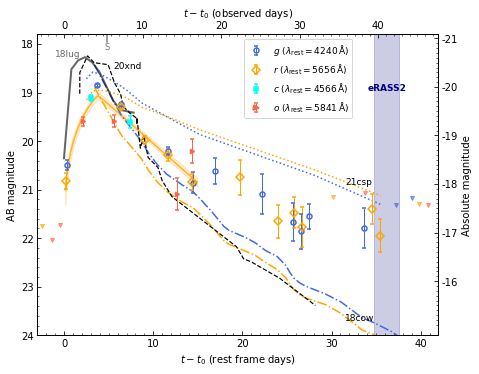

In [8]:
    lambs = np.array([lambda_eff_g_rest, 
                      #lambda_eff_c_rest, 
                      lambda_eff_r_rest
                      #lambda_eff_o_rest
                     ])

    det, nondet = load_fox_lc(SNT = 2.5, mjd_max = 59060, t0=t0, z=z)
    
    ixg = det['F'].values=="g"
    ixr = det['F'].values=="r"
    ixc = det["F"].values=="c"
    ixo = det["F"].values=="o"
    
    plt.figure(figsize=(6.5, 5.))
    ax = plt.subplot(111)
    add_mag(ax, det, ixg, colorg, marker = "o")
    add_mag(ax, det, ixr, colorr, marker = "D")
    add_mag(ax, det, ixc, colorc, marker = "s")
    add_mag(ax, det, ixo, coloro, marker = ">")
    
    add_model(ax)
    
    ixgn = nondet['F'].values=="g"
    ixrn = nondet['F'].values=="r"
    ixcn = nondet["F"].values=="c"
    ixon = nondet["F"].values=="o"
    
    add_upper_limit(ax, nondet, ixgn, colorg)
    add_upper_limit(ax, nondet, ixrn, colorr)
    add_upper_limit(ax, nondet, ixcn, colorc)
    add_upper_limit(ax, nondet, ixon, coloro)
    
    print ("Adding AT2018cow...")
    lwcow = 1.5
    tcow, absmagscow = predict_18cow_mag(lambs)
    magscow = absmagscow + dis_mod_
    ax.plot(tcow, magscow[0], color = colorg, linewidth = lwcow, linestyle = "-.")
    ax.plot(tcow, magscow[1], color = colorr, linewidth = lwcow, linestyle = "-.")
    ax.text(31.5, 23.7, "18cow", color = "k", fontsize = fs-1)
    
    print ("Adding AT2021csp...")
    lwcsp = 1.2
    tcsp, absmagscsp = predict_21csp_mag(lambs)
    magscsp = absmagscsp + dis_mod_
    ax.plot(tcsp, magscsp[0], color = colorg, linewidth = lwcow, linestyle = ":")
    ax.plot(tcsp, magscsp[1], color = colorr, linewidth = lwcow, linestyle = ":")
    ax.text(31.5, 20.9, "21csp", color = "k", fontsize = fs-1)
    
    print ("Adding Koala... use SNR threshold of 3")
    det_koala, nondet_koala = load_koala_lc(SNT = 3)
    nondet_koala = nondet_koala[nondet_koala.mjd < min(det_koala["mjd"])]
    add_koala(ax, det_koala, nondet_koala)
    
    print ("Adding 2020xnd, using r-band Table 1 of Perley+2021")
    add_20xnd(ax)
    
    add_legend(ax)
    
    add_tick(ax, xmax = 42)
    plt.tight_layout(rect = (-0.02, -0.03, 1.02, 1.03))